# ML Practical 1

This practical session is divided into 2 sections:

1. Linear Regression
2. Validation Approaches

## 0. Preliminary

To begin, lets load the packages that we will use. These are:
- For **loading** and **transforming** our data, we will use `pandas` and `numpy`
- For our **modelling**, we will use several `sklearn` sub-modules
- For **plotting**, we will use `seaborn` and `matplotlib`

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
)

from sklearn.metrics import (
    classification_report,
    accuracy_score,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
)

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
)

from sklearn.neighbors import KNeighborsClassifier

sns.set_theme()

## 1. Linear Regression

In the first part, we will load the `Boston` housing data set, and fit both a simple linear regression model with a single predictor, as well as a multinomial regression model, using additional variables.

We load the `Boston` dataset from the module's repository using pandas' `load_csv()` method.

Then, we print the first 10 rows of data using the `head()` method.

In [5]:
path = 'https://github.com/vladoxNCL/ml_course/raw/main/Boston.csv'
df = pd.read_csv(path)
df.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


Notice the first column is unnecessary, as it is just an index. We can *drop* it using pandas' `iloc` method and overwriting `df`:

In [6]:
df = df.iloc[:, 1:]
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


We will first fit a simple linear regression model, using `lstat` as the predictor and `medv` as the response.

In [7]:
X = df[['lstat']]
y = df['medv']

reg = LinearRegression()
reg.fit(X, y)

coef = reg.coef_[0]
inter = reg.intercept_

print(f'Coefficient: {coef}')
print(f'Intercept: {inter}')

Coefficient: -0.9500493537579906
Intercept: 34.5538408793831


Lets plot both the data and the fitted regression line

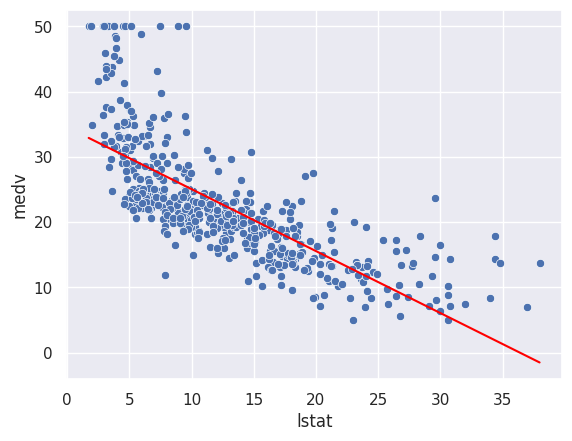

In [8]:
# Scatter plot of the data
sns.scatterplot(x=df['lstat'], y=df['medv'])

# Generate and plot the regression line
xmin, xmax= df['lstat'].min(), df['lstat'].max()
x_plot = np.linspace(xmin, xmax, 100)
y_plot = coef * x_plot + inter
sns.lineplot(x=x_plot, y=y_plot, color='red');

To test how good the model is at predicting *unknown* data, lets perform a train-test split, fit a model to the *training* data and then measure the model accuracy on the *test* set:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 5.789606996393182
R2 Score: 0.5429180422970384


### Multiple Linear Regression

Lets now consider using 2 predictors instead of just one: `age` and `lstat` and see how that impacts on the model performance.

When you notice your code is repetitive, it makes sense to wrap it in a **function** so that you can reuse it later. We will define a `fit_model` function that returns all the variables of interest to us:

In [10]:
def fit_model(data, preds, response):
    X = data[preds]
    y = data[response]

    reg = LinearRegression()
    reg.fit(X, y)

    coef = reg.coef_
    inter = reg.intercept_

    print(f'Coefficients: {coef}')
    print(f'Intercept: {inter}')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'RMSE: {rmse:.3f}')
    print(f'R2 Score: {r2:.3f}')
    return coef, inter

We can now use our function to try out different models very easily:

In [11]:
preds = ['age', 'lstat']
response = 'medv'

fit_model(df, preds, response)

Coefficients: [ 0.03454434 -1.03206856]
Intercept: 33.2227605317929
RMSE: 5.818
R2 Score: 0.538


(array([ 0.03454434, -1.03206856]), 33.2227605317929)

Adding `age` didn't improve the predictions much. Lets instead add a quadratic `lstat` transformation to the model:

In [12]:
df['lstat^2'] = df['lstat'] ** 2

preds = ['lstat', 'lstat^2']
response = 'medv'

coef, inter = fit_model(df, preds, response)

Coefficients: [-2.3328211   0.04354689]
Intercept: 42.862007328169355
RMSE: 5.231
R2 Score: 0.627


This is a much better fit! Lets plot the fitted curve
$$
\text{medv} = -2.333 \cdot \text{lstat} + 0.044 \cdot \text{lstat}^2 + 42.862
$$

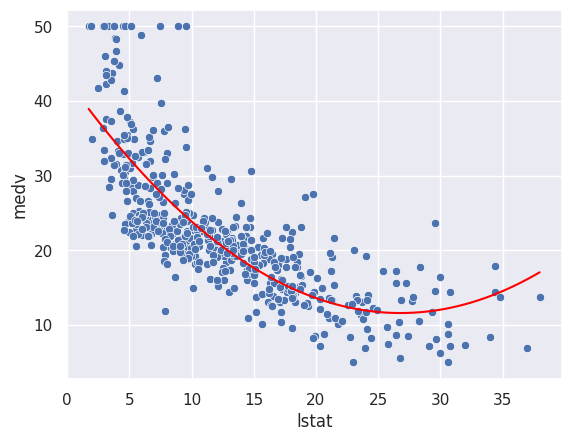

In [13]:
# Scatter plot of the data
sns.scatterplot(x=df['lstat'], y=df['medv'])

# Add quadratic regression curve
xmin, xmax = df['lstat'].min(), df['lstat'].max()
x_plot = np.linspace(xmin, xmax, 100)
y_plot = coef[0] * x_plot + coef[1] * x_plot ** 2 + inter
sns.lineplot(x=x_plot, y=y_plot, color='red');

Now try it yourself!

Load the `Auto` dataset from the module repository, and fit a simple regression model using `mpg` as response and `horsepower` as the predictor.

Try performing some transformations over `horsepower` and see if adding them to the model improves its performance.

In [14]:
path = 'https://github.com/vladoxNCL/ml_course/raw/main/Auto.csv'



### Hands On Extra

This question should be answered using the `Carseats` data set.

1. Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`
2. Provide an interpretation of each coefficient in the model. Be careful, some of the variables in the model are qualitative.
3. Write out the model in equation form, being careful to handle the qualitative variables properly.
4. How well does the model fit the data?

## EXTRA: Using `statsmodels`

An alternative to `sklearn` is `statsmodels`. This package has a much narrower selection of models, but it provides with a lot of additional stats about the model that might come in handy at analysing variable importances (using the variables' $p$-values) and plotting confidence intervals. The following example gives you an idea of how to use this package.

In [15]:
# import statsmodels

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.tools.eval_measures import mse

Lets generate some sythetic data from the following relationship:

$$
    y = 0.5 + x + x^3 + \epsilon
$$

Notice that there is no $x^2$ term in the equation. This should be detected by the $p$-value for $x^2$ in the resulting model (a predictor is important only if its associated $p$-value is **very** close to $0$)

In [16]:
# random number generator
rng = np.random.default_rng(seed=12345)

# generate X
n_sample = 100
x = rng.uniform(-1, 1, n_sample)
x = np.sort(x)
X = np.column_stack((x, x**2, x**3))

# add column of 1s for intercept
X = sm.add_constant(X)

# generate y
beta = np.array([0.5, 1, 0, 2])
y_gen = np.dot(X, beta)

# add random noise to data (the epsilon term)
e = 0.5 * rng.normal(size=n_sample)
y = y_gen + e

Now, lets fit our model using `statsmodels`, and print a summary of it.

Note that in `statsmodels`, linear regression is called `OLS`, short for *ordinary least squares*

In [17]:
# fit model and print the summary
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           9.03e-41
Time:                        19:26:49   Log-Likelihood:                -69.206
No. Observations:                 100   AIC:                             146.4
Df Residuals:                      96   BIC:                             156.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5241      0.077      6.816      0.0

The resulting model is:

$$
    \hat{y} = 0.5241 + 1.1211 x + 0.0060 x^2 + 1.8838 x^3
$$

- Notice that the coefficient for $x^2$ is quite small.
- Also notice that `x2`, the variable associated with $x^2$, has a relatively **high** $p$-value (shown in the `P>|t|` column).
- This means that the variable is not important, and should be removed from the model.

Lets do it:

In [18]:
X_new = X[:, [0, 1, 3]] # ignore the 2nd column (the one associated with x^2)
model = sm.OLS(y, X_new)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     296.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           4.63e-42
Time:                        19:27:44   Log-Likelihood:                -69.207
No. Observations:                 100   AIC:                             144.4
Df Residuals:                      97   BIC:                             152.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5260      0.051     10.375      0.0

While the `R-squared` variable is very similar for both models, there are two reasons why we should prefer this second model:
1. The **parsimony** principle (or *Occam's Razor*), by which we prefer *simpler* models if they perform about as well as a more complex one.
2. the `Prob (F-statistic)` statistic is much lower for the second model, indicating that it is actually a better fit.

The resulting model is:

$$
    \hat{y} = 0.5260 + 1.1215 x + 1.8832 x^3
$$

which is a good estimate of the data-generating function:

$$
    y = 0.5 + x + 2 x^3
$$

### Getting Confidence Intervals

Finally, lets use the `wls_prediction_std` function to generate a $95\%$ confidence intervals (CIs) for our model. This means that we expect that 95 out of 100 points will fall between these CIs.

In [19]:
prstd, iv_l, iv_u = wls_prediction_std(res)

By plotting everything together, we can verify that our fitted model is really close to the generating function, and that the CI *does* contain most of the actual data:

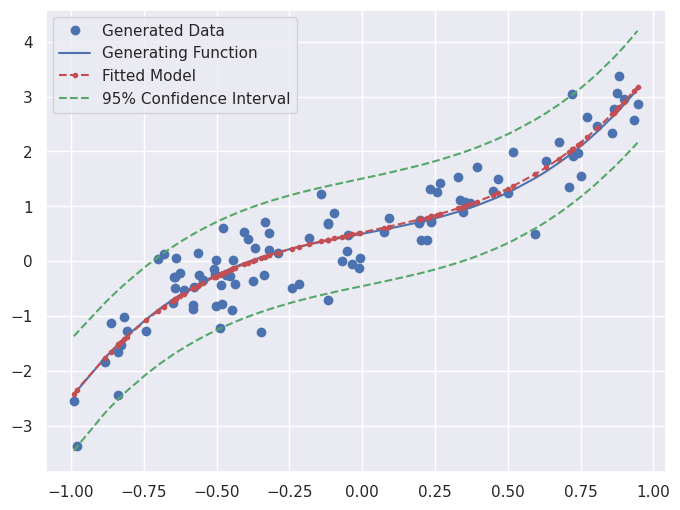

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label='Generated Data')
ax.plot(x, y_gen, 'b-', label='Generating Function')
ax.plot(x, res.predict(), 'r--.', label='Fitted Model')
ax.plot(x, iv_u, 'g--', label='95% Confidence Interval')
ax.plot(x, iv_l, 'g--')
ax.legend(loc='best');

### Hands On - Feature Selection

This method is known as **backward feature selection**, and is a way to obtain a more *parsimonious* model:

1. Using `statsmodels`, fit a linear regression model for the `Boston` data set, with `medv` as the response and all the remaining columns as predictors.
2. Based on the **model summary**, remove the predictor with the *highest* $p$-value, and fit the model again.
3. Keep doing this until all of the remaining predictors have a $p \le 0.05$ or another threshold, e.g., $0.01$.

Alternatively you could also perform **forward feature selection**:

1. If you have $m$ predictors, generate $m$ **simple linear regression** models, each with a single predictor, and select the one with the **lowest** MSE. Lets say this predictor is $X^*$.
2. Now, generate $m - 1$ models, each with $X^*$ and **one additional predictor**. Again, choose the model with the **lowest** MSE score.
3. Keep doing this until the MSE score doesn't improve **or** the $p$-value for some variable in the new model is higher than, say, $0.05$.

Try both approaches and see if you reach the same final model.

In [21]:
# load the Boston dataset
path = 'https://github.com/vladoxNCL/ml_course/raw/main/Boston.csv'
df = pd.read_csv(path)
df = df.iloc[:, 1:]
X = df.drop('medv', axis=1)
X = sm.add_constant(X)
y = df['medv']

In [23]:
# do your modelling here